In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv("Data/cardekho_data.csv")
pd.DataFrame(df)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
df[['Selling_Price', 'Present_Price']] = df[['Selling_Price', 'Present_Price']] * 100000 / 83
df[['Selling_Price', 'Present_Price']] = df[['Selling_Price', 'Present_Price']].round()
df[['Selling_Price', 'Present_Price']]

,Selling_Price,Present_Price
0,4036.0,6735.0
1,5723.0,11494.0
2,8735.0,11867.0
3,3434.0,5000.0
4,5542.0,8277.0
...,...,...
296,11446.0,13976.0
297,4819.0,7108.0
298,4036.0,13253.0
299,13855.0,15060.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
df["Fuel_Type"].unique(), df["Seller_Type"].unique(), df["Transmission"].unique(), df["Owner"].unique()

(array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object),
 array([0, 1, 3]))

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class NameDrop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Car_Name"], axis=1)
    
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transm, seller = {"Manual": 0, "Automatic": 1}, {"Dealer": 0, "Individual": 1}
        X['Seller_Type'] = X['Seller_Type'].map(seller)
        X['Transmission'] = X['Transmission'].map(transm)

        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Fuel_Type']]).toarray()
        m2 = encoder.fit_transform(X[['Seller_Type']]).toarray()
        m3 = encoder.fit_transform(X[['Transmission']]).toarray()

        column_names = ["Petrol", "Diesel", "CNG"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        cn2, cn3 = ['Dealer', 'Individual'], ['Manual', 'Automatic']

        for i in range(len(m2.T)):
            X[cn2[i]] = m2.T[i]

        for i in range(len(m3.T)):
            X[cn3[i]] = m3.T[i]


        return X.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1)

In [17]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("dropper", NameDrop()), 
    ("encoder", FeatureEncoder())
    ])

In [18]:
data = pipe.fit_transform(df)
data = pd.DataFrame(data)
data.shape

(301, 12)

In [19]:
import datetime
year= datetime.date.today().year
data['No_of_years']=year-data['Year']
data.drop('Year',axis=1,inplace=True)

In [20]:
data

,Selling_Price,Present_Price,Kms_Driven,Owner,Petrol,Diesel,CNG,Dealer,Individual,Manual,Automatic,No_of_years
0,4036.0,6735.0,27000,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,11
1,5723.0,11494.0,43000,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12
2,8735.0,11867.0,6900,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,8
3,3434.0,5000.0,5200,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,14
4,5542.0,8277.0,42450,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
296,11446.0,13976.0,33988,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9
297,4819.0,7108.0,60000,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,10
298,4036.0,13253.0,87934,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,16
299,13855.0,15060.0,9000,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8


In [21]:
corr_ = data.corr(numeric_only=True)
corr_["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878982
Diesel           0.552343
Dealer           0.550724
Automatic        0.367125
Kms_Driven       0.029186
Petrol          -0.025163
Owner           -0.088342
No_of_years     -0.236142
Manual          -0.367125
CNG             -0.540575
Individual      -0.550724
Name: Selling_Price, dtype: float64

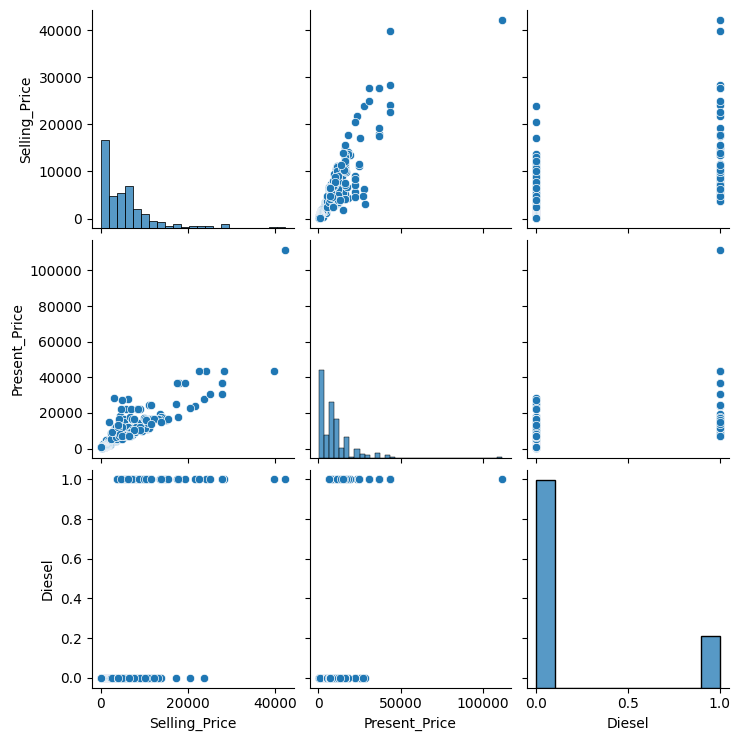

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
catts = ["Selling_Price", "Present_Price", "Diesel"]
sns.pairplot(data[catts], height=2.5)
plt.show()

,Selling_Price,Present_Price,Kms_Driven,Owner,Petrol,Diesel,CNG,Dealer,Individual,Manual,Automatic,No_of_years
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5616.023256,9190.950166,36947.205980,0.043189,0.006645,0.199336,0.794020,0.647841,0.352159,0.867110,0.132890,11.372093
std,6123.879830,10414.603765,38886.883882,0.247915,0.081378,0.400166,0.405089,0.478439,0.478439,0.340021,0.340021,2.891554
min,120.000000,386.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,1084.000000,1446.000000,15000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000
50%,4337.000000,7711.000000,32000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.000000
75%,7229.000000,11928.000000,48767.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,13.000000
max,42169.000000,111566.000000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000


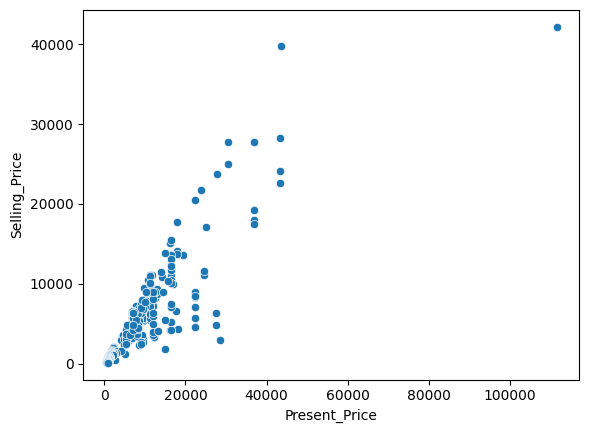

In [23]:
sns.scatterplot(data=data, x="Present_Price", y="Selling_Price")
data.describe()

In [24]:
data

,Selling_Price,Present_Price,Kms_Driven,Owner,Petrol,Diesel,CNG,Dealer,Individual,Manual,Automatic,No_of_years
0,4036.0,6735.0,27000,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,11
1,5723.0,11494.0,43000,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12
2,8735.0,11867.0,6900,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,8
3,3434.0,5000.0,5200,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,14
4,5542.0,8277.0,42450,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
296,11446.0,13976.0,33988,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9
297,4819.0,7108.0,60000,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,10
298,4036.0,13253.0,87934,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,16
299,13855.0,15060.0,9000,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

X = data.drop("Selling_Price", axis=1)
y= data["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
rnd_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
tree_reg = DecisionTreeRegressor()

In [27]:
from sklearn.model_selection import cross_val_score, KFold

tree_rmse = -cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmse).describe().round(3)

count      10.000
mean     2086.677
std      1228.587
min       909.635
25%      1088.028
50%      1618.596
75%      3045.752
max      4299.988
dtype: float64

In [28]:
tree_rmse = -cross_val_score(rnd_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmse).describe().round(3)

count      10.000
mean     2047.995
std      1044.126
min       838.551
25%      1322.887
50%      1709.394
75%      2701.349
max      3942.328
dtype: float64

In [29]:
tree_score, random_tree,  = cross_val_score(tree_reg, X_train, y_train, cv=10), cross_val_score(rnd_reg, X_train, y_train, cv=10)

In [30]:
import numpy as np 

np.mean(tree_score), np.mean(random_tree)

(np.float64(0.7888664074350953), np.float64(0.8474554909056593))

In [31]:

param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_leaf': [1, 2, 5, 10]
                }

rf_random = GridSearchCV(rnd_reg, param_grid, scoring = 'neg_mean_squared_error', n_jobs = -1)
rf_random.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,800


In [32]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 800}

In [34]:
rnd_reg = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=1, n_estimators=800, random_state=42, n_jobs=-1)
rnd_reg.fit(X_train, y_train)
y_pred = rnd_reg.predict(X_test)
rnd_reg.score(X_train, y_train)

0.9747192798501693

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_error

round(r2_score(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred), 2), round(max_error(y_test, y_pred), 2), round(mean_absolute_error(y_test, y_pred), 2)

(0.96, 1626924.38, 7428.06, 708.48)

In [36]:
df = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})

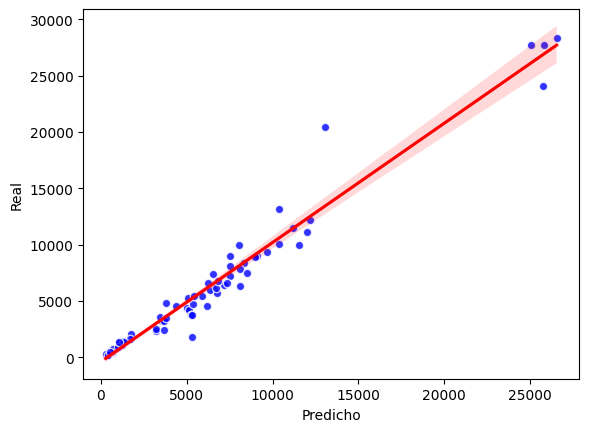

In [37]:
#sns.scatterplot(x=df['Predicho'], y=df['Real'] ,data=df, hue=data['Selling_Price'] ,palette=['red','green'] ,legend=False, line_kws={"color": "red"})
sns.regplot(x=df['Predicho'], y=df['Real'], scatter_kws={"color": "blue", "edgecolor": "white"}, line_kws={"color": "red"}) 
plt.show()

In [39]:
import joblib

joblib.dump(rf_random, 'car_price.joblib')

['car_price.joblib']